In [1]:
import cv2 as cv
import seaborn as sns
import os
import time
import pandas as pd
import SimpleITK as sitk
from skimage import io

In [3]:
if not os.path.exists('H:/Kaggle datasets/Thesis_Diabetic'):
    
    try:
        
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_1')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_2')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_3')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_4')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_0')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_1')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_2')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_3')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_4')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_0')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_1')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_2')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_3')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_4')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Successfully created directory


In [4]:
df_train = pd.read_csv('H:/Diabetic Retinopathy/trainLabels19.csv')

df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
#check total number of images

df_images = df_train.count()

print (f'Toal number of images in the training set {df_images}')

# number of images belonging to each level

unique_count = df_train['diagnosis'].value_counts()

unique_count

Toal number of images in the training set id_code      3662
diagnosis    3662
dtype: int64


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

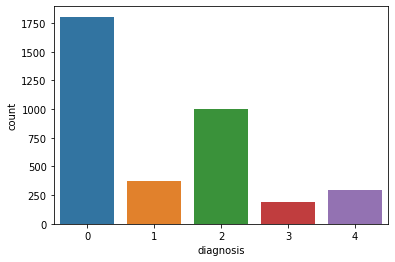

In [6]:
#check number of images in each class

sns.countplot(x = 'diagnosis', data = df_train)

In [7]:
df_train_new = df_train.iloc[:3100,:]
df_train_new.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [8]:
df_images = df_train_new.count()

print (f'Toal number of images in the new training set {df_images}')

# number of images belonging to each level

unique_count = df_train_new['diagnosis'].value_counts()

unique_count

Toal number of images in the new training set id_code      3100
diagnosis    3100
dtype: int64


0    1507
2     854
1     328
4     246
3     165
Name: diagnosis, dtype: int64

In [9]:
df_val = df_train.iloc[3101:,:]
df_val.head()

,id_code,diagnosis
3101,d807c53c1399,0
3102,d81338217fc5,2
3103,d81b6ed83bc2,2
3104,d838d5b9f571,0
3105,d83c3efade75,2


In [10]:
df_images = df_val.count()

print (f'Toal number of images in the new training set {df_images}')

# number of images belonging to each level

unique_count = df_val['diagnosis'].value_counts()

unique_count

Toal number of images in the new training set id_code      561
diagnosis    561
dtype: int64


0    298
2    145
4     48
1     42
3     28
Name: diagnosis, dtype: int64

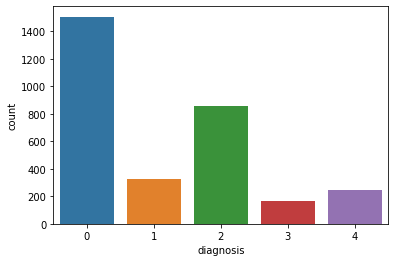

In [11]:
#train set

sns.countplot(x = 'diagnosis', data = df_train_new)

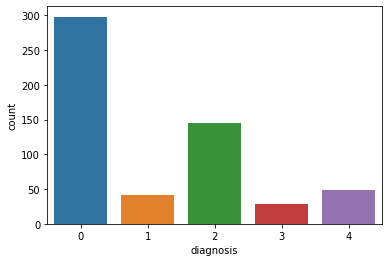

In [12]:
sns.countplot(x = 'diagnosis', data = df_val)

In [13]:
def create_dataset(df,path,image_size,dataset):
    
    for i, item in df.iterrows():
        
        img = sitk.ReadImage(path + item[0] +'.jpg')
        img = sitk.GetArrayFromImage(img)
        img = cv.resize(img,(image_size,image_size))
        
        if item[1]==0:
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_0/'+item[0]+f'_{dataset}_Level_0.png',img)
        elif item[1]==1:
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_1/'+item[0]+f'_{dataset}_Level_1.png',img)
        elif item[1]==2:
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_2/'+item[0]+f'_{dataset}_Level_2.png',img)
        elif item[1]==3:
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_3/'+item[0]+f'_{dataset}_Level_3.png',img)
        else:
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_4/'+item[0]+f'_{dataset}_Level_4.png',img)

In [15]:
path_train = 'H:/Diabetic Retinopathy/resized train 19/'

create_dataset(df_train_new,path_train,image_size=1024,dataset='Train')

print('Training set created')

Training set created


In [16]:
create_dataset(df_val,path_train,image_size=1024,dataset='Val')

print('Validation set created')

Validation set created


In [17]:
df_test = pd.read_csv('H:/Diabetic Retinopathy/testImages19.csv')

df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
